# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

## Dataset Description

This project uses the *Global Earthquake–Tsunami Risk Assessment Dataset* from Kaggle:
https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset

The dataset contains 782 global earthquakes recorded between 2001 and 2022. It includes spatial, temporal, and seismic features designed to assess tsunami risk.

### Key Variables

- **Year, Month** – Time of occurrence
- **latitude, longitude** – Geographic location of epicenter
- **magnitude** – Earthquake strength (Richter scale)
- **depth** – Focal depth (km)
- **sig** – Event significance score
- **cdi, mmi** – Intensity measures
- **tsunami** – Binary indicator (1 = tsunami potential, 0 = none)

The dataset provides both temporal (22 years) and spatial (global latitude/longitude) coverage, making it appropriate for analyzing trends across time and geographic space.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("earthquake_data_tsunami.csv")

df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


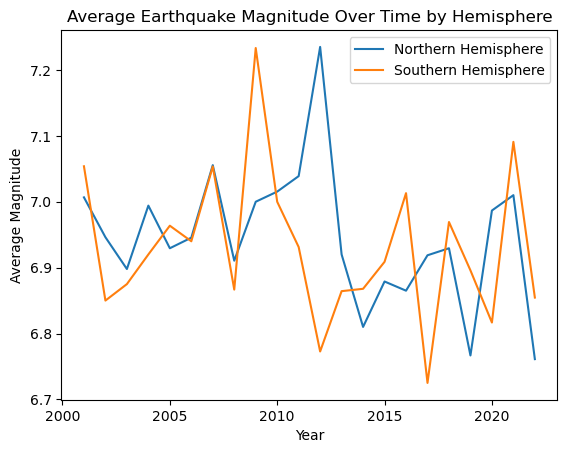

In [11]:
# Create hemisphere column (spatial grouping)
df["Hemisphere"] = df["latitude"].apply(lambda x: "Northern Hemisphere" if x >= 0 else "Southern Hemisphere")

# Compute yearly average magnitude by hemisphere
year_hemi_mag = df.groupby(["Year", "Hemisphere"])["magnitude"].mean().reset_index()

plt.figure()

# Plot each hemisphere separately for legend clarity
for hemi in year_hemi_mag["Hemisphere"].unique():
    subset = year_hemi_mag[year_hemi_mag["Hemisphere"] == hemi]
    plt.plot(subset["Year"], subset["magnitude"], label=hemi)

plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.title("Average Earthquake Magnitude Over Time by Hemisphere")
plt.legend()
plt.show()

### Visualization 1 Interpretation

Average earthquake magnitude remains relatively stable over time in both hemispheres, with no clear long-term upward or downward trend. The magnitude levels are similar across hemispheres, suggesting that earthquake intensity does not systematically vary by global north–south location over time.

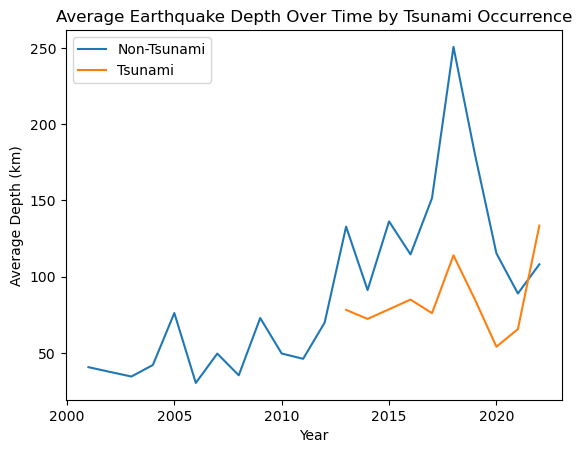

In [12]:
# Compute yearly average depth by tsunami classification
year_depth = df.groupby(["Year", "tsunami"])["depth"].mean().reset_index()

plt.figure()

for t in year_depth["tsunami"].unique():
    subset = year_depth[year_depth["tsunami"] == t]
    label = "Tsunami" if t == 1 else "Non-Tsunami"
    plt.plot(subset["Year"], subset["depth"], label=label)

plt.xlabel("Year")
plt.ylabel("Average Depth (km)")
plt.title("Average Earthquake Depth Over Time by Tsunami Occurrence")
plt.legend()
plt.show()

### Visualization 2 Interpretation

Tsunami-generating earthquakes tend to occur at shallower depths compared to non-tsunami events across most years. This pattern remains consistent over time, reinforcing the relationship between shallow seismic activity and increased tsunami risk.

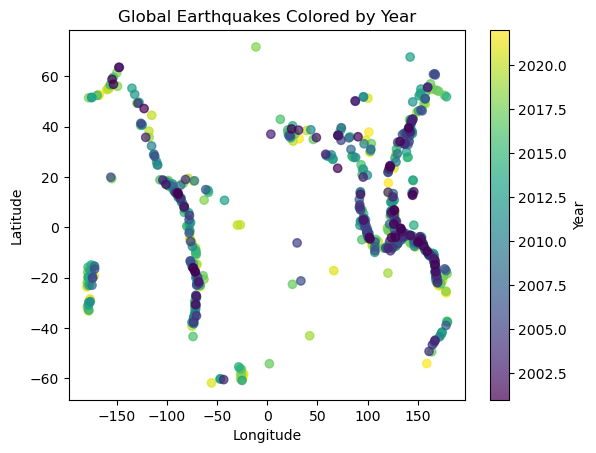

In [13]:
plt.figure()

scatter = plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["Year"],
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global Earthquakes Colored by Year")

cbar = plt.colorbar(scatter)
cbar.set_label("Year")

plt.show()

### Visualization 3 Interpretation

Earthquakes remain geographically concentrated along major tectonic boundaries throughout the entire time period. The color gradient shows that while earthquake events occur consistently over time, their spatial clustering does not significantly shift, indicating stable global seismic zones.